# Setting Up - Install Packages in the Workspace
Before you move on to the project instruction, follow the cells below to ensure you have the necessary packages installed. 
The cells below will also educate you on installing newer pinned packages, should you need them in the future. 

In [1]:
# Step 1. Update the PATH env var. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.6/site-packages"

In [ ]:
# Step 2. Restart the Kernel. 
# If you skip this step, your notebook may not be able to import the packages well. 


In [2]:
# Install the pinned version of packages, similar to below or use requirements.txt

!python -m pip install 'numpy==1.19.5' 'prompt-toolkit<2.0.0,>=1.0.15' 'jupyter-client>=7.0.0' 'jsonschema>=3.0.1' 'widgetsnbextension==3.0.0'


    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 22.9MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 18.4MB/s ta 0:00:01
    100% |████████████████████████████████| 2.5MB 9.8MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 20.3MB/s ta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: jupyter-core 4.4.0
    Uninstalling jupyter-core-4.4.0:
      Successfully uninstalled jupyter-core-4.4.0


  Found existing installation: jupyter-client 5.2.4
    Uninstalling jupyter-client-5.2.4:
      Successfully uninstalled jupyter-client-5.2.4
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
  Found existing installation: widgetsnbextension 3.1.0
    Uninstalling widgetsnbextension-3.1.0:
      Successfully uninstalled widgetsnbextension-3.1.0


In [22]:
# Check the version of any specific package
!python -m pip freeze | grep numpy

numpy==1.19.5


# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [4]:
from unityagents import UnityEnvironment
import numpy as np
import random
from collections import namedtuple, deque
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [7]:
print(f'The brain name being used is: {brain_name}.')

The brain name being used is: BananaBrain.


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [9]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [10]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

### Define the neural network architecture

In [10]:
class QNetwork(nn.Module):
    """Defines the neural network to be used to search for optimal policy (best action values)."""
    
    def __init__(self, state_size, action_size, fc1_units, fc2_units):
        """Initializes parameters and build the neural network.
        
        Args:
            state_size (int): Dimension of each state.
            action_size (int): Dimension of each action.
            fc1_units (int): Number of nodes in first hidden layer.
            fc2_units (int): Number of nodes in second hidden layer.
        """
        
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        
    def forward(self, state):
        """Performs a forward pass through the neural network previously initialized mapping environment states 
        to action values.
        
        Args:
            state (tensor): Environment current state.
        """
        
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        
        return self.fc3(x)
    

### Define the agent interactions

In [7]:
# def soft_update(local_model, target_model, tau):
#     """Soft update model parameters.
#     θ_target = τ*θ_local + (1 - τ)*θ_target

#     Args:
#         local_model (PyTorch model): Weights will be copied from.
#         target_model (PyTorch model): Weights will be copied to.
#         tau (float): Interpolation parameter.
#     """

#     for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
#         target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

In [11]:
class Agent:
    """Defines how the agent interacts with the environment."""
    
    def __init__(self, lr, buffer_size, batch_size, gamma, tau, update_every, fc1_units, fc2_units):
        """Initializes an agent.
        
        Args:
            lr (float): Learning rate for the neural netowrk optimizer.
            buffer_size (int): Maximum size of buffer where experiences are stored.
            batch_size (int): Size of each training batch.
            gamma (float): Discount factor.
            tau (float): Interpolation parameter.
            update_every (int): Every how many time steps the neural network parameters will be updated during training.
            fc1_units (int): Number of nodes to use on the first fully connected layer on the DQN.
            fc2_units (int): Number of nodes to use on the second fully connected layer on the DQN.
        """
        
        self.state_size = brain.vector_observation_space_size
        self.action_size = brain.vector_action_space_size
        
        # learning
        self.lr = lr
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.update_every = update_every
        self.t_step = 0
        
        # q-network
        self.fc1_units = fc1_units
        self.fc2_units = fc2_units
        
        self.qnetwork_local = QNetwork(self.state_size, self.action_size, self.fc1_units, self.fc2_units).to(device)
        self.qnetwork_target = QNetwork(self.state_size, self.action_size, self.fc1_units, self.fc2_units).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=self.lr)

        # replay memory
        self.memory = ReplayBuffer(self.action_size, self.buffer_size, self.batch_size)
        
    def step(self, state, action, reward, next_state, done):
        """Saves current experience tuple and learns if required.
        
        Args:
            state (array): Environment current state.
            action (int): Action taken.
            reward (int): Reward given by the environment based on state and action.
            next_state (array): Next state on current episode.
            done (bool): Indicates if the episode is finished.
        """
        # save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # learn every update_every time steps
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # if enough samples are available in memory, get random subset and learn
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Args:
            state (array): Environemnt current state.
            eps (float): Epsilon, for epsilon-greedy action selection.
        """
        
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        
        self.qnetwork_local.train()

        # epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Args:
            experiences (Tuple[torch.Variable]): Tuple of (s, a, r, s', done) tuples.
            gamma (float): Discount factor.
        """
                
        # extract data from experiences
        states, actions, rewards, next_states, dones = experiences

        # get max predicted Q values (for next states) from target model
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        
        # compute Q targets for current states 
        Q_targets = rewards + (self.gamma * Q_targets_next * (1 - dones))

        # get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        
        # clear the gradients
        self.optimizer.zero_grad()
        
        # perform a backward pass to calculate gradients
        loss.backward()
        
        # update the model parameters
        self.optimizer.step()

        # update target network
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)
    
    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Args:
            local_model (PyTorch model): Weights will be copied from.
            target_model (PyTorch model): Weights will be copied to.
            tau (float): Interpolation parameter.
        """

        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

In [12]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size):
        """Initialize a ReplayBuffer object.

        Args:
            action_size (int): Possible number of actions that an agent can take.
            buffer_size (int): Maximum size of buffer.
            batch_size (int): Size of each training batch.
        """
        
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

### Define training procedure

In [13]:
def set_seed(seed):
    """Initialize random number generators with a seed value to ensure that the same sequence of random numbers
    is generated every time we train the agent.
    
    Args:
        seed (int): Seed value for random generated numbers.
    """
    random.seed(seed)
    torch.manual_seed(seed)
    

In [14]:
def train_dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, score_goal=13):
    """Deep Q-Learning.
    
    Args:
        n_episodes (int): Maximum number of training episodes.
        max_t (int): Maximum number of timesteps per episode.
        eps_start (float): Starting value of epsilon, for epsilon-greedy action selection.
        eps_end (float): Minimum value of epsilon.
        eps_decay (float): Multiplicative factor (per episode) for decreasing epsilon.
        score_goal (int): The minimum average score over 100 consecutive episodes to consider the environment as solved.
    """
    
    scores = []                        
    scores_window = deque(maxlen=100)  
    eps = eps_start                    
    
    for i_episode in range(1, n_episodes+1):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        
        # get the current state
        state = env_info.vector_observations[0]
        
        # initialize the score
        score = 0
        
        for t in range(max_t):
            # select an action
            action = agent.act(state, eps)
            
            # send the action to the environment
            env_info = env.step(action)[brain_name]
            
            # get the next state
            next_state = env_info.vector_observations[0]
            
            # get the reward
            reward = env_info.rewards[0]
            
            # see if episode has finished
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
            if done:
                break 
        
        # save most recent score
        scores_window.append(score)
        scores.append(score)
        
        # decrease epsilon
        eps = max(eps_end, eps_decay*eps) 
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=score_goal:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    
    return scores

### Putting everything together

In [15]:
# parameters setup
BUFFER_SIZE = int(1e5)
BATCH_SIZE = 32
GAMMA = 0.99
TAU = 1e-3
LR = 5e-4
UPDATE_EVERY = 4
SEED = 42
FC1_NODES = 64
FC2_NODES = 64
EPISODES = 2000
MAX_TIME_STEP = 1000
EPS_START = 1.0
EPS_END = 0.01
EPS_DECAY = 0.995
SCORE_GOAL = 15

In [16]:
# set seed
set_seed(SEED)

# get torch device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Torch device available: {device}.')

Torch device available: cuda:0.


In [ ]:
# initialize environment (skip if initialized at the beginning of the notebook)
# env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

In [17]:
# initialize agent
agent = Agent(
              lr=LR,
              buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE,
              gamma=GAMMA,
              tau=TAU,
              update_every=UPDATE_EVERY,
              fc1_units=FC1_NODES,
              fc2_units=FC2_NODES,
             )

In [18]:
# train the agent and get scores
scores = train_dqn(
        n_episodes=EPISODES,
        max_t=MAX_TIME_STEP,
        eps_start=EPS_START,
        eps_end=EPS_END,
        eps_decay=EPS_DECAY,
        score_goal = SCORE_GOAL
        )


Episode 100	Average Score: 0.88
Episode 200	Average Score: 4.19
Episode 300	Average Score: 7.10
Episode 400	Average Score: 9.29
Episode 500	Average Score: 12.66
Episode 600	Average Score: 14.12
Episode 700	Average Score: 13.38
Episode 766	Average Score: 15.06
Environment solved in 666 episodes!	Average Score: 15.06


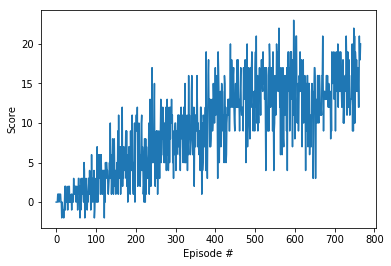

In [19]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
# if done close the environment
env.close()